In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# load csv data from kaggle 
# https://www.kaggle.com/datasets/whenamancodes/fraud-detection?resource=download

cc_data_raw = pd.read_csv('creditcard.csv')

# view data - 284807 rows × 31 columns
cc_data_raw


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.00,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,7.31,1.91,...,0.21,0.11,1.01,-0.51,1.44,0.25,0.94,0.82,0.77,0
284803,172787.00,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.29,0.58,...,0.21,0.92,0.01,-1.02,-0.61,-0.40,0.07,-0.05,24.79,0
284804,172788.00,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.71,0.43,...,0.23,0.58,-0.04,0.64,0.27,-0.09,0.00,-0.03,67.88,0
284805,172788.00,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.68,0.39,...,0.27,0.80,-0.16,0.12,-0.57,0.55,0.11,0.10,10.00,0


In [6]:

cc_data_raw.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [7]:
cc_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
cc_data_raw.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [9]:
cc_data_raw['Class'].value_counts()
y = cc_data_raw['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [10]:

X = cc_data_raw.drop(['Class','Time'], axis=1)
cc_data_raw.columns



Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [12]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,7.31,1.91,4.36,...,1.48,0.21,0.11,1.01,-0.51,1.44,0.25,0.94,0.82,0.77
284803,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.29,0.58,-0.98,...,0.06,0.21,0.92,0.01,-1.02,-0.61,-0.40,0.07,-0.05,24.79
284804,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.71,0.43,-0.48,...,0.00,0.23,0.58,-0.04,0.64,0.27,-0.09,0.00,-0.03,67.88
284805,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.68,0.39,-0.40,...,0.13,0.27,0.80,-0.16,0.12,-0.57,0.55,0.11,0.10,10.00


<Axes: >

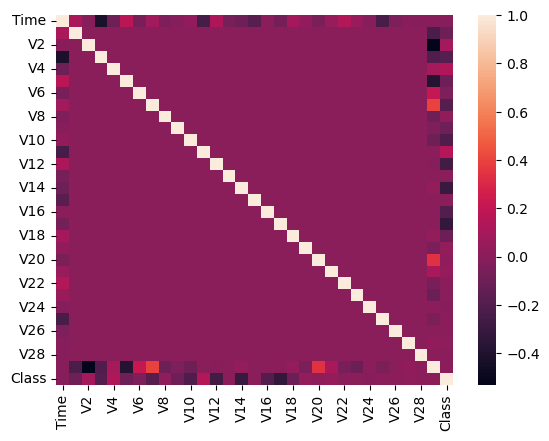

In [13]:
sns.heatmap(cc_data_raw.corr())



<Axes: ylabel='Class'>

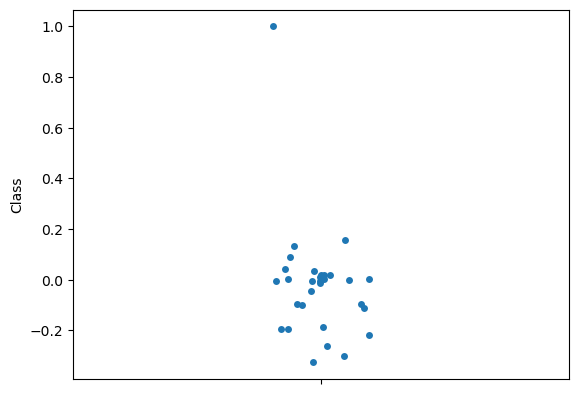

In [14]:
sns.stripplot(cc_data_raw.corr()['Class'])
#sns.boxplot(cc_data_raw.corr()['Class'])

In [15]:
cc_data_raw.corr()['Class']

Time     -0.01
V1       -0.10
V2        0.09
V3       -0.19
V4        0.13
V5       -0.09
V6       -0.04
V7       -0.19
V8        0.02
V9       -0.10
V10      -0.22
V11       0.15
V12      -0.26
V13      -0.00
V14      -0.30
V15      -0.00
V16      -0.20
V17      -0.33
V18      -0.11
V19       0.03
V20       0.02
V21       0.04
V22       0.00
V23      -0.00
V24      -0.01
V25       0.00
V26       0.00
V27       0.02
V28       0.01
Amount    0.01
Class     1.00
Name: Class, dtype: float64

In [16]:
model = LogisticRegression()
# split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [17]:
# train the model
model.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_pred = model.predict(X_test)



In [19]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[71076    13]
 [   44    69]]


In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9991994606893064


In [21]:
# accuracy: Accuracy = (TP + TN)/(TP + FP + TN + FN)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
# output: 0.999115193393444

# precision: Precision = TP/(TP + FP)
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))
# output: 0.8125

# recall: Recall = TP/(TP + FN)
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))
# output: 0.5752212389380531

# F1 score weighted average of precision and recall
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))
# output: 0.6735751295336788

0.9991994606893064
0.8414634146341463
0.6106194690265486
0.7076923076923077


<Axes: xlabel='Label', ylabel='Value'>

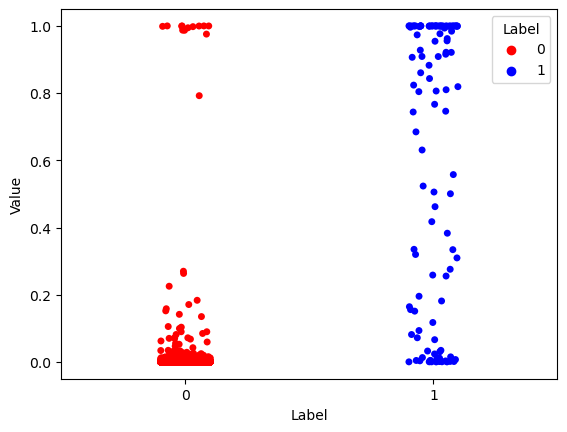

In [22]:
# we need to improve the precision and recall for our model
# lets graph the probabilities colored by y_test
y_proba = model.predict_proba(X_test)
# probability of 2nd class (positive review)
data = {'Value': y_proba[:,1],
        'Label': y_test}
df = pd.DataFrame(data)

# Set up a custom color palette for the binary values (0 and 1)
palette = {0: 'red', 1: 'blue'}
# Plot the data as a bar chart with each column representing one feature value,
# and the hue indicating whether that observation is positive or negative

sns.stripplot(x='Label', y='Value', data=df, hue='Label', palette=palette)

In [23]:
# Define your desired threshold
new_threshold = 0.07

# Manually classify based on the new threshold
y_pred_class = np.where(y_proba >= new_threshold, 1, 0)



In [24]:

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_class[:,1]))
# Threshold: 0.5 -> 0.07
# TPs: 65 -> 89
# FPs: 15 -> 28
# FNs: 48 -> 24
# TNs: 71074 -> 71061


# accuracy: Accuracy = (TP + TN)/(TP + FP + TN + FN)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_class[:,1]))
# output: 0.999115193393444 -> 0.9992696834358585

# precision: Precision = TP/(TP + FP)
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred_class[:,1]))
# output: 0.8125 -> 0.7606837606837606

# recall: Recall = TP/(TP + FN)
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred_class[:,1]))
# output: 0.5752212389380531 -> 0.7876106194690266

# F1 score weighted average of precision and recall
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_class[:,1]))
# output: 0.6735751295336788 -> 0.7739130434782607

[[71056    33]
 [   25    88]]
0.9991854161399961
0.7272727272727273
0.7787610619469026
0.752136752136752


In [26]:
import os
# Set the number of CPU cores your process can use
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
# Honestly still not great, lets explore other classifying algoritms to see if we can
# improve our overall stats

import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)
models = clf.fit(X_train, X_test, y_train, y_test)

 38%|███▊      | 11/29 [03:25<03:05, 10.31s/it]

: 

: 

2.0.3
